In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from PIL import  Image
%matplotlib inline
import pandas as pd
#to manipulate date variables
import datetime
#statistical graphics
import seaborn as sns


sns.set()
plt.style.use('fivethirtyeight')

In [2]:
#reading the dataset
df = pd.read_csv("spacex_launch_data.csv")

df.head(10)

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
0,1,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,NaN,LEO,SpaceX,Success,Failure (parachute)
1,2,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel o...",NaN,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,3,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2+,525,LEO (ISS),NASA (COTS),Success,No attempt
3,4,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,5,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
5,6,2013-09-29,16:00:00,F9 v1.1 B1003,VAFB SLC-4E,CASSIOPE,500,Polar LEO,MDA,Success,Uncontrolled (ocean)
6,7,2013-12-03,22:41:00,F9 v1.1,CCAFS LC-40,SES-8,"3,170",GTO,SES,Success,No attempt
7,8,2014-01-06,22:06:00,F9 v1.1,CCAFS LC-40,Thaicom 6,"3,325",GTO,Thaicom,Success,No attempt
8,9,2014-04-18,19:25:00,F9 v1.1,CCAFS LC-40,SpaceX CRS-3,"2,296",LEO (ISS),NASA (CRS),Success,Controlled (ocean)
9,10,2014-07-14,15:15:00,F9 v1.1,CCAFS LC-40,OG2 Mission 1 6 Orbcomm-OG2 satellites,"1,316",LEO,Orbcomm,Success,Controlled (ocean)


In [3]:
#to show all indicators
df.describe()

,Flight Number,Date,Time (UTC),Booster Version,Launch Site,Payload,Payload Mass (kg),Orbit,Customer,Mission Outcome,Landing Outcome
count,57,57,57,57,57,57,55,57,57,57,57
unique,57,57,55,53,4,57,48,8,30,3,12
top,1,2010-06-04,23:03:00,F9 v1.1,CCAFS LC-40,Dragon Spacecraft Qualification Unit,"9,600",GTO,NASA (CRS),Success,No attempt
freq,1,1,2,5,26,1,5,22,14,55,18


In [4]:
#showing info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57 entries, 0 to 56
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Flight Number      57 non-null     object
 1   Date               57 non-null     object
 2   Time (UTC)         57 non-null     object
 3   Booster Version    57 non-null     object
 4   Launch Site        57 non-null     object
 5   Payload            57 non-null     object
 6   Payload Mass (kg)  55 non-null     object
 7   Orbit              57 non-null     object
 8   Customer           57 non-null     object
 9   Mission Outcome    57 non-null     object
 10  Landing Outcome    57 non-null     object
dtypes: object(11)
memory usage: 5.0+ KB


In [10]:
#checking for datatype
df.dtypes

Flight Number        object
Date                 object
Time (UTC)           object
Booster Version      object
Launch Site          object
Payload              object
Payload Mass (kg)    object
Orbit                object
Customer             object
Mission Outcome      object
Landing Outcome      object
dtype: object

In [5]:
#rows and columns nbr
print(df.shape)

(57, 11)


In [6]:
#checking for null
df.isnull().values.any()

True

In [3]:
#changing date from object to date, with formatting date, year, month by names, splitting hour.
df["Date"]  = pd.to_datetime(df["Date"],format="%Y-%m-%d")
df["year"]  = pd.DatetimeIndex(df["Date"]).year
df["month"] = pd.DatetimeIndex(df["Date"]).month
df["month"] = df["month"].map({1:"JAN",  2:"FEB",  3:"MAR",  4:"APR",  5:"MAY",  6:"JUN",
                                              7:"JUL",  8:"AUG",  9:"SEP", 10:"OCT",
                                               11:"NOV", 12:"DEC"})
df["hour"]  = df["Time (UTC)"].str.split(":").str[0]
df["month_year"] = df["month"].astype(str) + "-" + df["year"].astype(str)                               

In [4]:
#checking again to make sure of date
df.dtypes

Flight Number                object
Date                 datetime64[ns]
Time (UTC)                   object
Booster Version              object
Launch Site                  object
Payload                      object
Payload Mass (kg)            object
Orbit                        object
Customer                     object
Mission Outcome              object
Landing Outcome              object
year                          int64
month                        object
hour                         object
month_year                   object
dtype: object

/Users/humambarazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


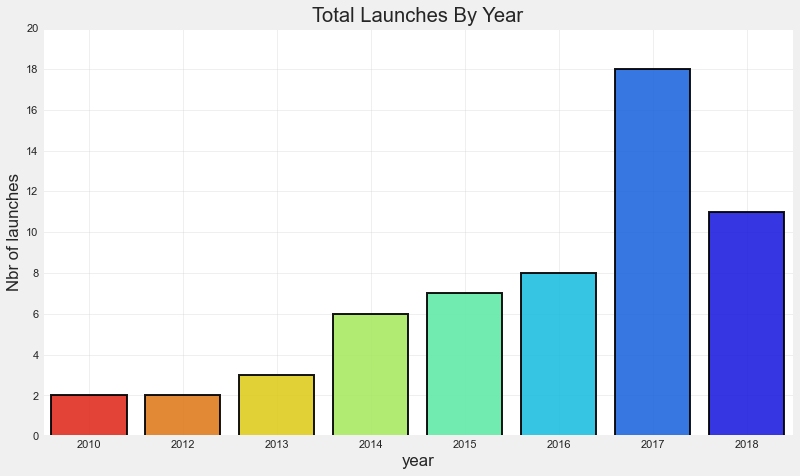

In [5]:
#total SpaceX launches by year using seaborn with plt

#groupy year, flight number to split them,
#then we count and reset the index after we used groupby 
year = df.groupby("year")["Flight Number"].count().reset_index()

#fig size
plt.figure(figsize=(12,7))

#graph configuration 
tl = sns.barplot("year","Flight Number",data=year,
                 palette="jet_r",linewidth=2,
                 edgecolor=["black"]*len(year),
                 alpha=.9)
#background colour
tl.set_facecolor("white")

tl.set_ylabel("Nbr of launches")

#Spaced values with given interval
plt.yticks(np.arange(0,22,2))
plt.title("Total Launches By Year")

#to configure grid lines
plt.grid(True, alpha=.3)

plt.show()

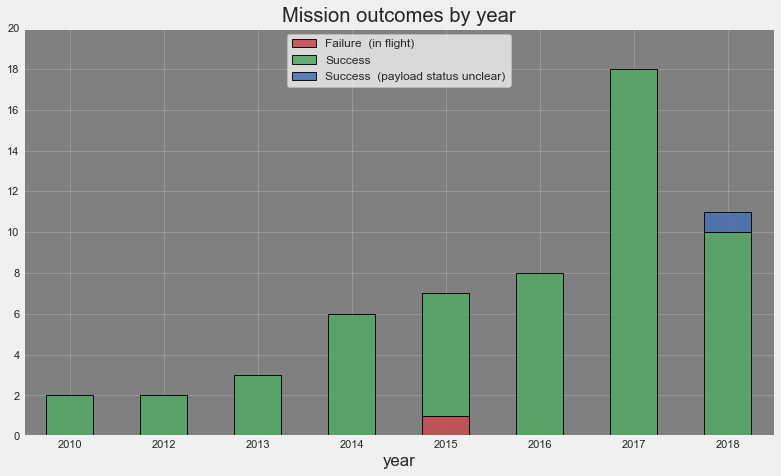

In [11]:
#Mission outcomes by year

#Pandas cross-tabulation of 2 or more factors
tl = pd.crosstab(df["year"],df["Mission Outcome"])

#Graph configuration
xx = tl.plot(kind="bar", stacked=True, figsize=(12,7),
             linewidth=1, edgecolor=['none']*df["year"].nunique(),
             color='rgb', alpha=0.9)

#Spaced values with given interval
plt.yticks(np.arange(0,22,2))
#to configure grid lines
plt.grid(True,alpha=.3)
plt.title("Mission outcomes by year")
plt.legend(loc="upper center",prop={"size":12})
plt.xticks(rotation=0)

xx.set_facecolor("grey")
plt.show()

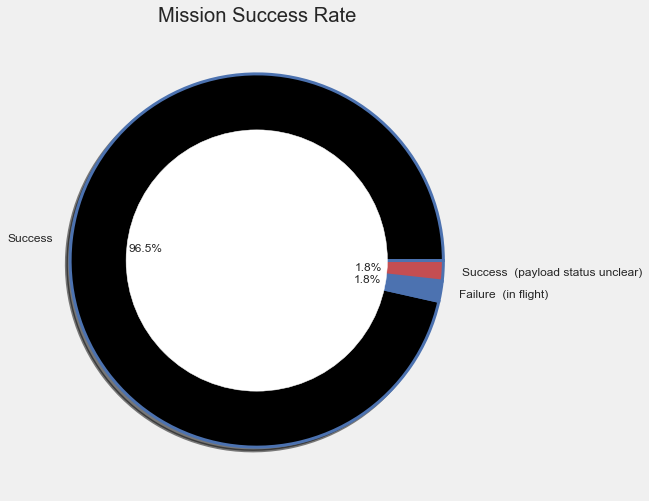

In [13]:
#showing full mission success rate

plt.figure(figsize=(8,8))
#plotting using pie chart from matplotlib. Autopct to display the percent values using string formatting
#the rest are normal graph configuration.
df["Mission Outcome"].value_counts().plot.pie(autopct="%1.1f%%",
                                                      fontsize=12,
                                                      colors = ["black","b","r"],
                                                      wedgeprops={"linewidth":3,"edgecolor":"b"},
                                                      shadow=True)
circ = plt.Circle((0,0),.7,color="white")
#getting the current axes
plt.gca().add_artist(circ)
plt.ylabel("")
plt.title("Mission Success Rate")
plt.show()

In [16]:
#showing the details and information about the failed mission
failed = df[df["Mission Outcome"] == "Failure  (in flight)"].transpose()[:12].reset_index()
failed.columns = ["Launch details","Information"]

#to limit data before applying the properties
failed = failed.style.set_properties(**{'background-color': 'silver',
                                         'color': 'red',
                                        'border-color': 'white'}).set_caption("Mission Failed")

display(failed)

,Launch details,Information
0,Flight Number,19
1,Date,2015-06-28 00:00:00
2,Time (UTC),14:21:00
3,Booster Version,F9 v1.1 B1018
4,Launch Site,CCAFS LC-40
5,Payload,SpaceX CRS-7
6,Payload Mass (kg),"1,952"
7,Orbit,LEO (ISS)
8,Customer,NASA (CRS)
9,Mission Outcome,Failure (in flight)


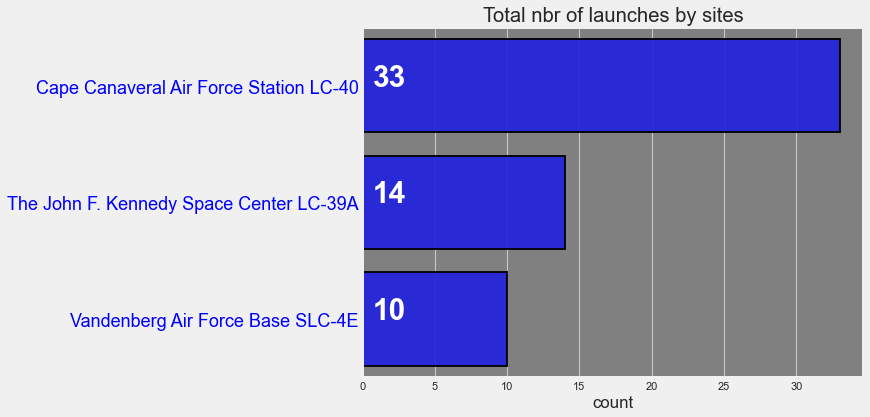

In [26]:
#there are 3 launches sites for SpaceX
#showing number of launches by each site

#.map for outside writings
df["Launch_site_f"] = df["Launch Site"].map({"CCAFS LC-40" :"Cape Canaveral Air Force Station LC-40",
                                                            "CCAFS SLC-40" :"Cape Canaveral Air Force Station LC-40",
                                                            "KSC LC-39A"   :"The John F. Kennedy Space Center LC-39A",
                                                            "VAFB SLC-4E"  :"Vandenberg Air Force Base SLC-4E"})

plt.figure(figsize=(8,6))
#Graph configuration
ls = sns.countplot(y = df["Launch_site_f"],palette=["blue"],
                  order=df["Launch_site_f"].value_counts().index,
                  linewidth=2,
                  edgecolor=['none'],
                  alpha=.9)

ls.set_facecolor("grey")
plt.ylabel("")
plt.xlabel("count")
plt.yticks(color="blue",fontsize=18)
plt.title("Total nbr of launches by sites")

#enumerat function we used to keep track both of index and values
#(counts and ravel from pandas to count unique values and to change dimensional array to flattered array)
for i,j in enumerate(df["Launch_site_f"].value_counts().values.ravel()):
    ls.text(.7,i,j,color="w",weight="bold",fontsize=30)
    
plt.show()

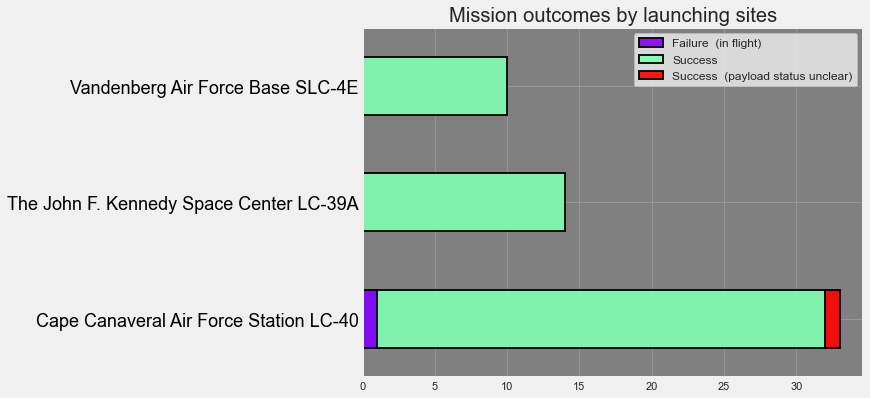

In [149]:
#showing mission outcomes by launching sites

#Pandas cross-tabulation of 2 or more factors
bls = pd.crosstab(df["Launch_site_f"],df["Mission Outcome"])

#Graph configuration
xx = bls.plot(kind="barh",stacked=True,figsize=(8,6),
            colormap="rainbow",
            linewidth=2,
            edgecolor=['none'],
            alpha = .9)

#to configure grid lines
plt.grid(True,alpha=.3)
plt.title("Mission outcomes by launching sites")
plt.legend(loc="upper right",prop={"size":12})
plt.xticks(rotation=0)
plt.ylabel("")
plt.yticks(color="black",fontsize=18)
xx.set_facecolor("grey")
plt.show()

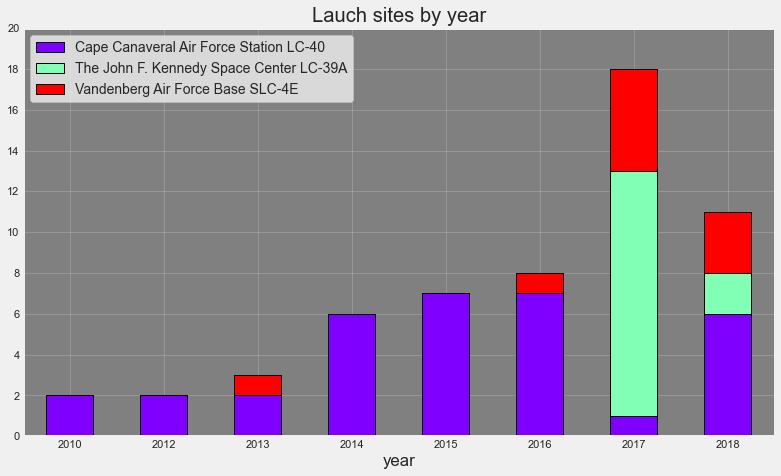

In [150]:
#launch sites by each year

#Pandas cross-tabulation of 2 or more factor
lsby = pd.crosstab(df["year"],df["Launch_site_f"])
#Graph configuration
xx = lsby.plot(kind="bar",stacked=True,figsize=(12,7),
            colormap="rainbow",
             linewidth=1,
             edgecolor=['none']*df["year"].nunique(),
             alpha  = 1)
plt.xticks(rotation=0)
plt.legend(loc="upper left",prop={"size":14})
#Spaced values with given interval
plt.yticks(np.arange(0,22,2))
plt.grid(True,alpha=.3)
plt.title("Lauch sites by year")
xx.set_facecolor("grey")
plt.show()

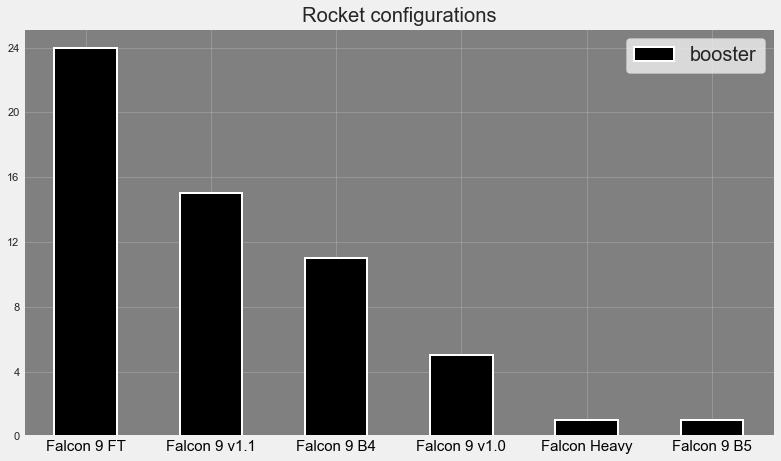

In [39]:
#Rocket Configurations
#nbr of each rocket that has been launched

#str.split to split a string into substrings
df["booster"] = df["Booster Version"].str.split(" ").str[1]
df["booster"] = "Falcon 9 " + df["booster"]
df.loc[48,"booster"] = "Falcon Heavy"

plt.figure(figsize=(12,7))

#Graph configuration
xx = df["booster"].value_counts().plot(kind="bar",
                                               color="black",
                                               linewidth=2,
                                               edgecolor=['white']*df["booster"].nunique())
plt.xticks(rotation=0,fontsize=15,color="black")
#^ rotation = 0 to rotate xticks label text 
plt.yticks(np.arange(0,28,4))
plt.legend(loc="upper right",prop={"size":20})
plt.grid(True,alpha=.3)
plt.title("Rocket configurations")
xx.set_facecolor("grey")
plt.show()

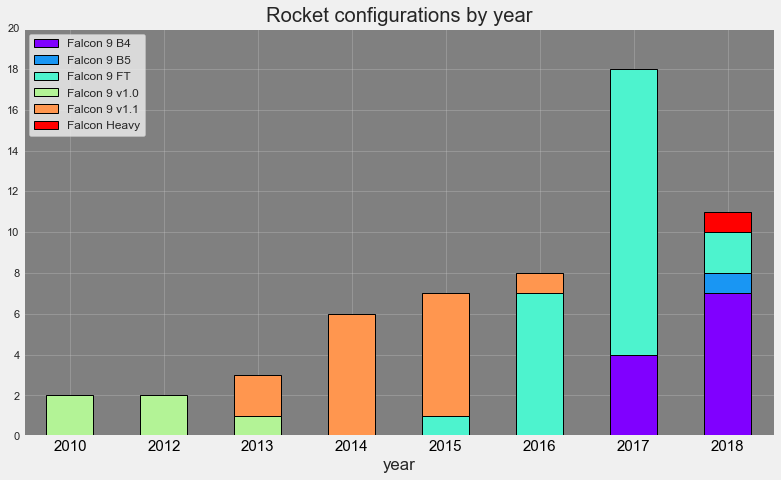

In [48]:
#plotting rocket configurations by each year

#Pandas cross-tabulation of 2 or more factor
rcby = pd.crosstab(df["year"],df["booster"])

#Graph configuration
xx = rcby.plot(kind="bar",stacked=True,
             figsize=(12,7),colormap="rainbow",
             linewidth=1,edgecolor=['black']*df["year"].nunique())

#rotation = 0 to rotate xticks label text
plt.xticks(rotation=0, fontsize=15,color="black")
plt.legend(loc="upper left",prop={"size":12})
#Spaced values with given interval
plt.yticks(np.arange(0,22,2))
plt.grid(True,alpha=.3)
plt.title("Rocket configurations by year")

xx.set_facecolor("grey")
plt.show()

/Users/humambarazi/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



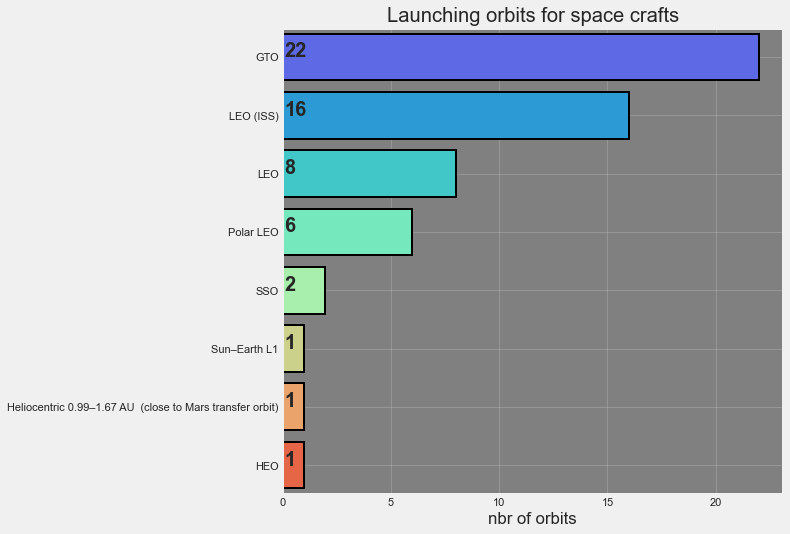

In [57]:
#plotting launching orbits for space crafts.

plt.figure(figsize=(8,8))

lo = df["Orbit"].value_counts().reset_index()
#Graph configuration 
xx  = sns.barplot("Orbit","index",
                  data=lo,
                  linewidth=2,
                  edgecolor=['black']*len(lo),
                  palette = "rainbow")

xx.set_facecolor("grey")
plt.xlabel("nbr of orbits")
plt.ylabel("")
plt.grid(True,alpha=.3)

#enumerat function we used to keep track both of index and values
for i,j in enumerate(lo["Orbit"].values):
    xx.text(.10,i,j,weight="bold",fontsize=20)

plt.title("Launching orbits for space crafts")
plt.show()